# k-최근접 이웃 알고리즘 (knn)

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='gulim')
plt.rc('axes', unicode_minus=False)

fpath = "../dataset"

## 도미자료와 방어자료 불러오기

In [2]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# list 길이
print(type(bream_length))
print("length of bream = ", len(bream_length), "\nlength of smelt = ",len(smelt_length))

# 용약 통계량
print("mean of 도미길이 = ", round(np.mean(bream_length), ndigits = 2))
print("mean of 방어길이 = ", round(np.mean(smelt_length), ndigits = 2))

print("mean of 도미무게 = ", round(np.mean(bream_weight), ndigits = 2))
print("mean of 방어무게 = ", round(np.mean(smelt_weight), ndigits = 2))

<class 'list'>
length of bream =  35 
length of smelt =  14
mean of 도미길이 =  33.11
mean of 방어길이 =  11.92
mean of 도미무게 =  617.83
mean of 방어무게 =  11.18


## 산점도 그리기 (scatter plot)

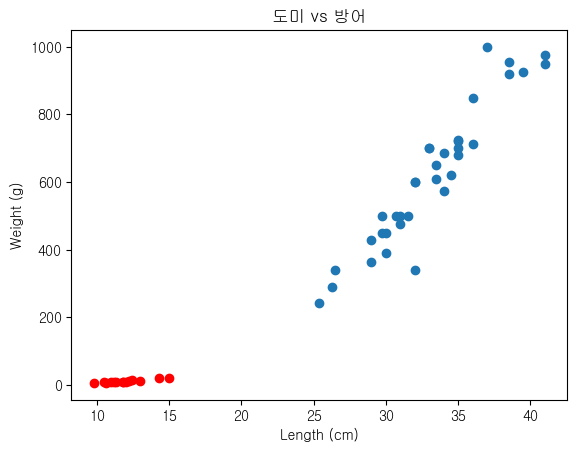

In [27]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight, c = "r")
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title("도미 vs 방어")
plt.show() # plot all open figures


## list 자료를 sklearn 입력 형식에 맞게 수정
- 1차원 리스트 -> 2차원 리스트
- Feature set과 Target set으로 구성

In [4]:

## Add two list 
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(weight))

# print("길이 = ", length[:10])
# print("무게 = ", weight[:10])


(49,)
(49,)


In [5]:
## zip function을 이용해서 1차원 list 자료를 2차원 list 자료로 변환 

fish_data_0 = [[l, w] for l, w in zip(length, weight)]
# print(fish_data_0)
print("데이터 타입 fish_data_0 =", type(fish_data_0))
print("배열크기 fish_data_0 = ", np.shape(fish_data_0))


#  numpy 를 이용해서 변환: tuple 
fish_data = np.column_stack((length, weight))
# print(fish_data)?
print("데이터 타입 fish_data =", type(fish_data))
print("배열크기 fish_data = ", np.shape(fish_data))

print(fish_data[:10,])

데이터 타입 fish_data_0 = <class 'list'>
배열크기 fish_data_0 =  (49, 2)
데이터 타입 fish_data = <class 'numpy.ndarray'>
배열크기 fish_data =  (49, 2)
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]]


In [6]:
# target encoding [1, 0]
fish_target_0 = [1]*35 + [0]*14
print(fish_target_0)


## using np.append
one_index = np.ones(35)
zero_index = np.zeros(14)

print(one_index)
print(zero_index)

fish_target = np.append(one_index, zero_index)

print(fish_target)

# np.concatenate: tuple로 전달
# fish_target = np.concatenate((np.ones(35), np.zeros(14))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
# import knn 클래스 import
from sklearn.neighbors import KNeighborsClassifier

# 클래스 객체 만들기/ learning parameter setting
# n_neighbors : int, default=5
kn = KNeighborsClassifier(n_neighbors = 5, 
                          weights='uniform', 
                          metric='minkowski', 
                          p = 2)
# ML learning
kn.fit(fish_data, fish_target)

# sklearn classification mean accuracy
kn.score(fish_data, fish_target)

1.0

In [8]:
## Attribute
print("classes = ", kn.classes_)
print("metrics = ", kn.effective_metric_)
print("samples = ", kn.n_samples_fit_)
# print("parameters = ", kn.effective_metric_params_)
# print("feature names = ", kn.feature_names_in_) Defined only when X has feature names that are all strings.


classes =  [0. 1.]
metrics =  euclidean
samples =  49


## 자료분할 (Data splitting)

In [9]:
# fish_data, fish_target
print('bream data 배열 = ',np.shape(bream_length))
print('smelt data 배열 = ',np.shape(smelt_length))

print('fish data 배열 = ',np.shape(fish_data))
print('fish target 배열 = ',np.shape(fish_target))

bream data 배열 =  (35,)
smelt data 배열 =  (14,)
fish data 배열 =  (49, 2)
fish target 배열 =  (49,)


### 샘플편향 (Sampling bias)

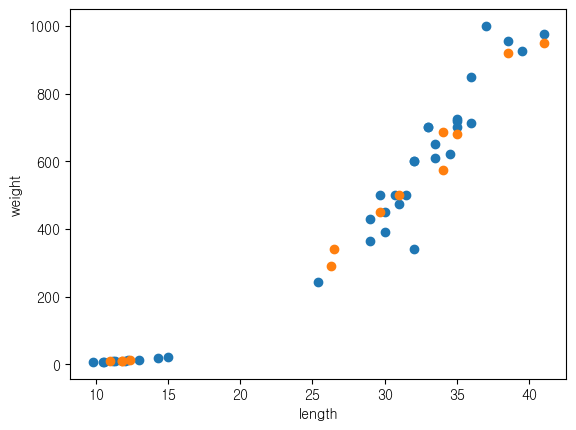

In [30]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

print(train_input[:10])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]]


In [32]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### Random shuffling

In [33]:
np.random.seed(42)

# Return evenly spaced values within a given interval.
index = np.arange(49) # 0~48 int32 형 자료 생성
# index = np.arange(0, 49, 2)
# print('index = ',index)

#Randomly permute a sequence in place 
np.random.shuffle(index)
print('index after shuffle = ',index)


index after shuffle =  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### 셔플링을 이용한 자료분할

In [34]:
train_input = fish_data[index[:35]]
train_target = fish_target[index[:35]]


test_input = fish_data[index[35:]]
test_target = fish_target[index[35:]]

print(train_input)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]


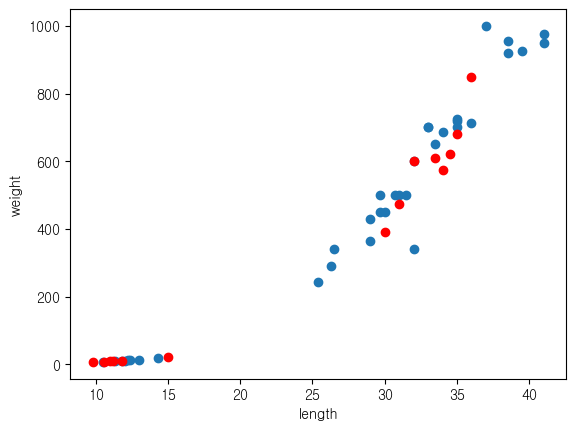

In [35]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1], c = "r")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
# fitting using shuffled data
kn = kn.fit(train_input, train_target)
print("Test acc = ", kn.score(test_input, test_target))

# Predict the class labels for the provided data.
print('Predicted = ', kn.predict(test_input))
# print("predict prob = ",  kn.predict(test_input))
print('True = ', test_target)

## acc 
# corr_pred = kn.predict(test_input) == test_target
# print("Test accuracy = ", corr_pred.mean())

Test acc =  1.0
Predicted =  [0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
True =  [0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


### Learning 사용된 자료 확인하기

In [37]:
print('Features = ', kn._fit_X)
print('Target = ', kn._y)
print(kn.get_params)

Features =  [[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
Target =  [1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]
<bound method BaseEstimator.get_params of KNeighborsClassifier()>


### sklearn 으로 훈련세트와 테스트 세트 나누기

In [38]:
from  sklearn.model_selection import train_test_split

# default test_size = 0.25
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print('훈련자료 배열크기 = {0}, 테스트자료 배열크기 = {1}'.format(train_input.shape, test_input.shape))

# train_test_split(
#     *arrays,
#     test_size=None,
#     train_size=None,
#     random_state=None,
#     shuffle=True,
#     stratify=None,
# )

훈련자료 배열크기 = (36, 2), 테스트자료 배열크기 = (13, 2)


In [39]:
## 문제
'''
Seaborn iris 자료를 이용하여 KNN 분류하고 정확도 측정
'''


'\nSeaborn iris 자료를 이용하여 KNN 분류하고 정확도 측정\n'

# 특성공학 (Feature engineering)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

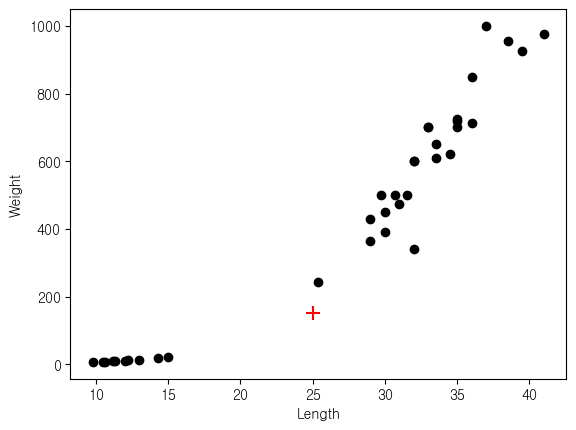

In [41]:
# from matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1], c = "k")
plt.scatter(25, 150, marker = "+", s = 100, c = "r")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### 주어진 샘플에서 가까운 이웃찾기

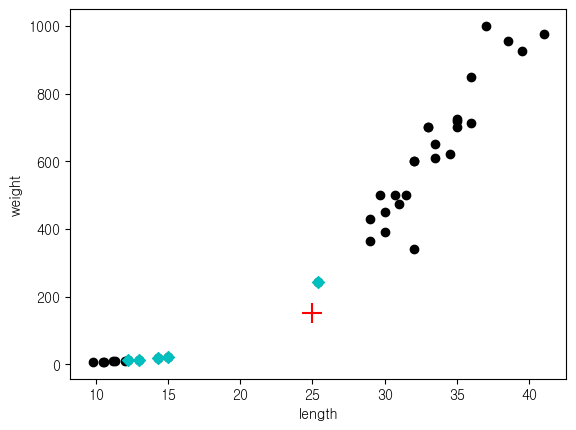

In [42]:
# Finds the K-neighbors of a point.
distance, index = kn.kneighbors([[25, 150]])

# print(kn.kneighbors([[25, 150]]))

plt.scatter(train_input[:,0], train_input[:,1], c = "k")
plt.scatter(25, 150, marker ="+", c = "r", s = 200)
plt.scatter(train_input[index, 0], train_input[index, 1],
            marker = "D", c = "c")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 이웃한 데이터 포인트찾기

In [43]:
print('훈련자료의 이웃자료 = {0}, \n훈련자료의 그룹 = {1}'.format(train_input[index], train_target[index]))
print('훈련자료와의 거리는 = {}'.format(distance))


훈련자료의 이웃자료 = [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]], 
훈련자료의 그룹 = [[1. 0. 0. 0. 0.]]
훈련자료와의 거리는 = [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 자료의 표준화 (Feature scaling)

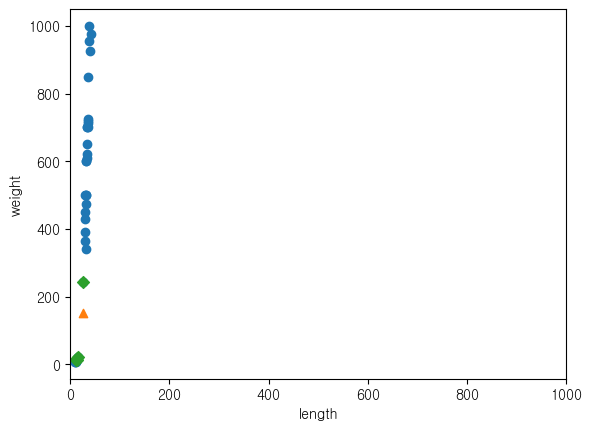

In [44]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[index,0], train_input[index,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### z-score : 모든 자료를 평균이 0이고 표준편차가 1인 자료로 변환

In [45]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print('평균은 ={0}, 표준편차 = {1}'.format(mean, std))

train_scaled = (train_input - mean)/std

평균은 =[ 27.29722222 454.09722222], 표준편차 = [  9.98244253 323.29893931]


z-score 점수는 = [-0.23012627 -0.63129568]


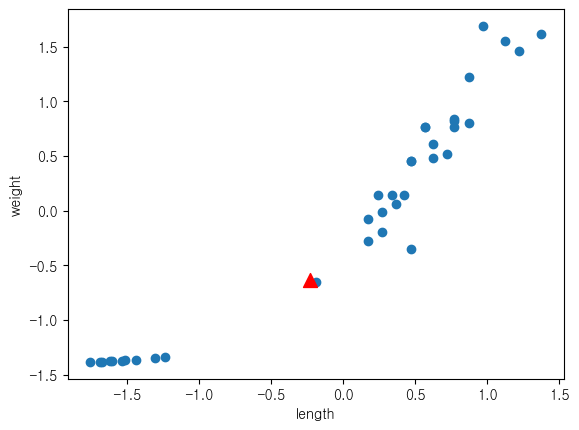

In [46]:
### prediction [25, 150]
new = ([25, 250] - mean)/std
print('z-score 점수는 =', new)

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^', s  = 100, c = "r")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
###
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)
print('Accuracy of test set= ', kn.score(test_scaled, test_target))
print(kn.predict([new]))

Accuracy of test set=  1.0
[1.]


In [48]:
distances, indexes = kn.kneighbors([new])

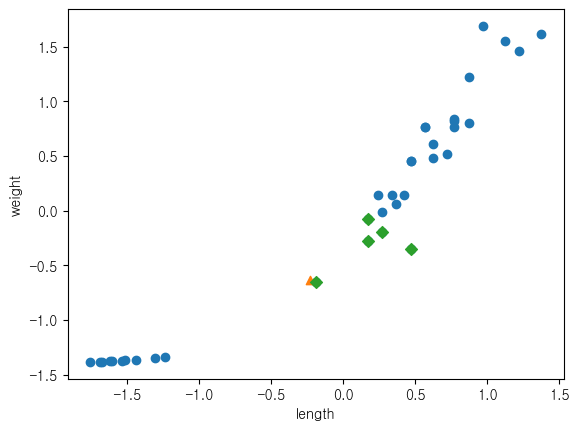

In [49]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(train_input)

print(ss.mean_)
print(ss.scale_)
print(ss.n_features_in_)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]
2


# 사용예제

In [52]:

# Example
# --------
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X, y)

print(neigh.predict([[1.1]]))
# [0]
print(neigh.predict_proba([[0.9]]))
# [[0.66666667 0.33333333]]


# X = [[0], [1], [2], [3]]
# y = [0, 0, 1, 1]
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier()
# neigh.fit(X, y)

# neigh.n_neighbors=3
# print(neigh.predict([[1.1]]))
# # [0]
# print(neigh.predict_proba([[0.9]]))
# # [[0.66666667 0.33333333]]

[0]
[[0.66666667 0.33333333]]


In [53]:
## 문제
'''
Seaborn iris 자료를 정규화하고 KNN 분류를 실시

'''


'\nSeaborn iris 자료를 정규화하고 KNN 분류를 실시\n\n'

# 확인문제

In [54]:
kn = KNeighborsClassifier()

score_list = []
n_list = []
for n in range(1, 30):
    # 최근접 이웃 개수 설정
    if n % 2 != 0:
        
        kn.n_neighbors = n
        kn.fit(train_scaled, train_target)
        score = kn.score(test_scaled, test_target)
        n_list.append(n)
        score_list.append(score)   

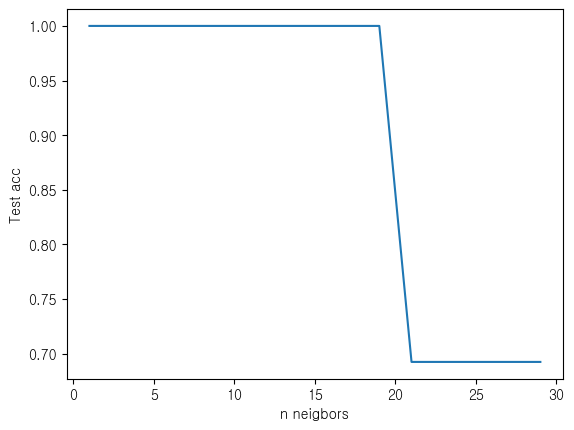

In [55]:
plt.plot(n_list, score_list)
plt.xlabel("n neigbors")
plt.ylabel("Test acc")
plt.show()

In [56]:
## knn 학습 parameter

#### n_neighbors : int, default=5
#### weights : {'uniform', 'distance'} or callable, default='uniform'
#### algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
#### leaf_size : int, default=30
#### metric : str or callable, default='minkowski'